Digit Reconizer project

In [139]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns

import keras
import keras.utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping

In [77]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='label', ylabel='count'>

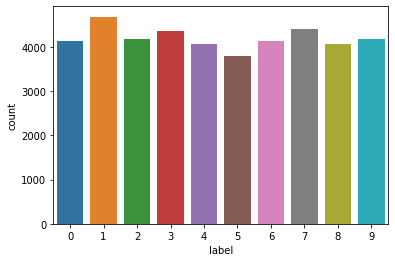

In [21]:
sns.countplot(x=train['label'])

In [122]:
x_train = train.iloc[:,1:].values.astype('float32')
y_train = train.iloc[:,0].values.astype('int8')

x_test = test.values.astype('float32')

In [123]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [124]:
x_train = x_train/255
x_test = x_test/255

y_train = tf.keras.utils.to_categorical(y_train, 10)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, shuffle=True)

In [136]:
batch_size = 32
epochs = 30
input_shape = (28,28,1)

In [127]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3,3), activation='relu',input_shape=input_shape, padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
#Output dimension: 14x14x32

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.2))
#Output dimension: 8x8x128

model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
#Output dimension: 4x4x512

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))


In [128]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [140]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15, # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(x_train)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=1)

In [141]:
print("Training:")
model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_val, y_val), verbose=1, callbacks=[early_stopping])

Training:
Epoch 1/30
271/985 [=======>......................] - ETA: 3:20 - loss: 0.0787 - accuracy: 0.9756